### Embedding Size
- indobenchmark/indobert-base-p1: 768
- intfloat/multilingual-e5-small: 384

In [9]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore
import faiss
import numpy
import os
from dotenv import load_dotenv

load_dotenv()
gemini_api = os.environ["GOOGLE_GENERATIVE_AI"]
embedding_model = os.environ["EMBEDDING_MODEL"]

file_path = "material/buku%20pengantar%20akuntansi.pdf"
loader = PyPDFLoader(file_path=file_path)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
   chunk_size=500, chunk_overlap=10
)

chunks = text_splitter.split_documents(docs)

embeddings = HuggingFaceEmbeddings(model_name=embedding_model)
vector = embeddings.embed_documents(str("chunks"))
matrix = numpy.array(vector).astype('float32')
index = faiss.IndexFlatL2(matrix.shape[1])
vector_store = FAISS(
   embedding_function=embeddings,
   index=index,
   docstore=InMemoryDocstore(),
   index_to_docstore_id={}
)
vector_store.add_documents(chunks)

No sentence-transformers model found with name indobenchmark/indobert-base-p1. Creating a new one with mean pooling.


['f7cff742-a625-466f-9827-a0e4e5c7982c',
 '6ffaaf17-abe4-48f6-935f-a3867186b544',
 '02258c24-f082-40f8-9d85-2c9d7bbb8f9b',
 '40d371b6-ab2a-4cef-aa60-eb67ea62f9db',
 '08839e1d-78fb-48ac-bdbc-8c622fa63390',
 '0a2fca3f-da67-40ed-a256-888cba9aaf14',
 'ea8427c2-2d17-4c0f-987a-8e91fb49d1f5',
 '207ef0e9-93fc-4db4-84f8-0a89f7a47d80',
 'e0e4d257-1a44-4211-a7ce-397de5a45625',
 '7961a507-e05f-4edd-b103-939f023ad93e',
 'f5355b99-5bd6-48f4-bbc7-5ebb24b65ceb',
 '5c085a7f-f69d-4124-bf7c-32f1edacf043',
 '6de78821-47fb-4bfd-8b66-34cc0983bcaa',
 '6acb4b2f-32dc-4c8c-b250-2246897bf064',
 '9290bedb-dec3-4f48-9639-de3db0fbef84',
 '2a3ec824-6eb2-4b0e-9311-73e6f1434f5c',
 'c7968656-af8b-4979-a773-b333bbefb253',
 '554ea097-2316-40fe-a6f9-a9ca53d20448',
 '16b31ede-7677-4118-b986-094266b5b9ff',
 'a7723ec9-de9c-425f-85c6-cd47217ed4ca',
 '3da54b32-1c12-4882-b3b1-55721add6c37',
 'ff5e5be6-73b6-4997-becd-b7605069d5dd',
 '4403fd26-677a-45e9-ae10-6208d56208dd',
 '9de341c2-d171-4c51-a419-a877f7498b5c',
 '59cf2de5-829b-

In [10]:
vector_store.max_marginal_relevance_search(query="laporan SAK ETAP", k=3)

[Document(metadata={'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 59}, page_content='55\nMADANG RAYA \nJURNAL PENYESUAIAN'),
 Document(metadata={'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 61}, page_content='Indonesia, 2009a:2.37).      \n        \n1.3 Laporan Keuangan Menurut SAK ETAP  \n1.3.1 Elemen Laporan Keuangan Menurut SAK ETAP  \n       SAK ETAP (2009) menjelaskan bahwa laporan keuangan suatu entitas terdiri \ndari:  \n1. Neraca  \nNeraca menyajikan aset , kewajiban dan ekuitas entitas pada suatu tanggal \ntertentu akhir pelaporan dan minimal mencakup pos-pos sebagai berikut: \na. Kas dan setara kas;  \nb. Piutang usaha dan piutang lainnya;  \nc. Persediaan;  \nd. Properti investasi;  \ne. Aset tetap;'),
 Document(metadata={'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 11}, page_content='penjelasan alasan penggantian tersebut pada laporan keuangan perusahaannya.')]

In [11]:
vector_store.similarity_search(query="laporan SAK ETAP", k=3)

[Document(metadata={'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 63}, page_content='menurut SAK ETAP yang dikutip oleh Ranu Ag us (2011), yaitu aktivitas operasi, \naktivitas investasi, dan aktivitas pendanaan. \n5. Catatan atas laporan keuangan  \nCatatan atas laporan keuangan berisi informasi sebagai tambahan informasi \nyang disajikan dalam laporan keuangan catatan atas laporan keuangan \nmemberikan penjelasan nararif atau rincian jumlah yang disajikan dalam laporan \nkeuangan dan informasi pos-pos yang tidak memenuhi kriteria pengakuan dalam'),
 Document(metadata={'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 65}, page_content='dengan penurunan atas investasi pemilik sebagai akibat dari operasi yang tidak \nmenguntungkan dan alokasi kepada pemilik (SAK ETAP, 2009a.2.19). \n \n \nLaporan Keuangan menurut SAK EMKM (IAI, 2016) \nLaporan keuangan minimum terdiri dari : \n1. Laporan Posisi Keuangan pada akhir periode \n2. Laporan laba rugi selama perio

## Using Langchain Version 2

In [12]:
from langchain.tools.retriever import create_retriever_tool

retriever = vector_store.as_retriever()
retriever_tool = create_retriever_tool(
   retriever=retriever,
   name="document_retriever_tool",
   description="Gunakan tools ini untuk mencari informasi berkaitan dengan Akuntansi, Finansial, dan Perbankan"
)

tools = [retriever_tool]

## Using Langchain Version 3 (custom tools)

In [13]:
from langchain_core.tools import tool
from pydantic import BaseModel, Field

class RetrieverInput(BaseModel):
   query: str = Field(description="Query User untuk mencari informasi pada dokumen")

@tool(response_format="content_and_artifact")
def retrieve(query: str):
   """Gunakan tools ini untuk mencari informasi berkaitan dengan Akuntansi, Finansial, dan Perbankan"""
   retrieve_docs = vector_store.similarity_search(query=query, k=3)
   serialized = "\n\n".join(
      (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
      for doc in retrieve_docs
   )
   return serialized, retrieve_docs

In [14]:
retrieve("sak etap")

/var/folders/l8/ck3mp1pj7ld2k6cmb0703cfc0000gn/T/ipykernel_69056/362104747.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieve("sak etap")


"Source: {'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 76}\nContent: 72\n\nSource: {'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 59}\nContent: 55\nMADANG RAYA \nJURNAL PENYESUAIAN\n\nSource: {'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 58}\nContent: 54\nMADANG RAYA \nJURNAL PENYESUAIAN"

## Using Class Wrapper

In [15]:
from langchain_core.tools import BaseTool
from pydantic import BaseModel, Field

class RetrieverInput(BaseModel):
   query: str = Field(description="Query User untuk mencari informasi pada dokumen")

class Retrieve(BaseTool):
   name: str = "document_retrieve_tool"
   description: str = "Gunakan tools ini untuk mencari informasi berkaitan dengan Akuntansi, Finansial, dan Perbankan"
   response_format: str = "content_and_artifact"
   vector_store: FAISS

   def _run(self, query: str) -> dict[str, any]:
      retrieve_docs = self.vector_store.similarity_search(query=query, k=3)
      serialized = "\n\n".join(
         (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}") 
         for doc in retrieve_docs
      )
      return serialized, retrieve_docs

In [16]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
   model="gemini-1.5-pro",
   temperature=0.8,
   api_key=gemini_api
)

In [17]:
from langgraph.graph import MessagesState, StateGraph, END

graph_builder = StateGraph(MessagesState)
def retrieve_or_respon(state: MessagesState):
   """Tentukan langkah untuk menggunakan tools atau langsung merespon"""
   llm_with_tools = llm.bind_tools([Retrieve(vector_store=vector_store)])
   response = llm_with_tools.invoke(state['messages'])
   return {"messages": [response]}

In [18]:
from langchain_core.messages import SystemMessage

def generate(state: MessagesState):
   """Hasilkan respon"""
   print(state["messages"])
   recent_tool_messages = []
   for message in reversed(state["messages"]):
      if message.type == "tool":
         recent_tool_messages.append(message)
      else:
         break
   tool_messages = recent_tool_messages[::-1]

   docs_content = "\n\n".join(doc.content for doc in tool_messages)
   system_message_content = (
      "Kamu merupakan asisten AI bernama DesiAI yang ahli dalam bidang Akuntansi," 
      "Finansial dan Perbankan. Gunakanlah Tools Retrieve untuk mencari informasi "
      "berdasarkan dari query yang diberikan. Kombinasikan pengetahuanmu dengan informasi yang diberikan " 
      "agar menghasilkan jawaban yang akurat.\n\n"
      f"{docs_content}\n\n"
   )
   conversation_messages = [
      message
      for message in state["messages"]
      if message.type in ("human", "system")
      or (message.type == "ai" and not message.tool_calls)
   ]
   prompt = [SystemMessage(system_message_content)] + conversation_messages
   print(prompt)
   response = llm.invoke(prompt)
   return {"messages": [response]}

In [19]:
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

tools = ToolNode([Retrieve(vector_store=vector_store)])
memory = MemorySaver()

graph_builder.add_node(retrieve_or_respon)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("retrieve_or_respon")
graph_builder.add_conditional_edges(
   "retrieve_or_respon",
   tools_condition,
   {
      END: END,
      "tools": "tools"
   }
)

graph_builder.add_edge(start_key="tools", end_key="generate")
graph_builder.add_edge(start_key="generate", end_key=END)
graph = graph_builder.compile(checkpointer=memory)

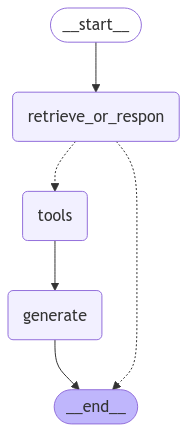

In [20]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
config = {"configurable" : {
   "thread_id": "10010"
}}

In [23]:
from langchain_core.messages import HumanMessage

input_message = "Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik, gunakan tools"
final_state = graph.invoke(
    {"messages": [HumanMessage(content=input_message)]},
    config={"configurable": {"thread_id": 42}}
)
final_state["messages"][-1].content

[HumanMessage(content='Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik, gunakan tools', additional_kwargs={}, response_metadata={}, id='be7b1a32-060b-4b5e-8b4a-8cf400e3a690'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'document_retrieve_tool', 'arguments': '{"query": "Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-b29bc4ac-39f5-45ba-9c76-68095878607d-0', tool_calls=[{'name': 'document_retrieve_tool', 'args': {'query': 'Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik'}, 'id': '27a75345-c647-496e-b3d8-1995807de19e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 72, 'output_tokens': 20, 'total_tokens': 92, 'input_token_details': {'cache_read': 0}}), ToolMessage(content="Source: {'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 65}\nContent: Pada pembahasan berikut kit

'Saya DesiAI, asisten AI yang ahli di bidang Akuntansi, Keuangan, dan Perbankan. Saya akan mencoba menjawab pertanyaan Anda.\n\nBerdasarkan informasi yang saya miliki, laporan SAK ETAP merujuk pada laporan keuangan yang disusun berdasarkan Standar Akuntansi Keuangan Entitas Tanpa Akuntabilitas Publik (SAK ETAP).  SAK ETAP adalah standar akuntansi yang disederhanakan dan ditujukan untuk entitas tanpa akuntabilitas publik.  Entitas tanpa akuntabilitas publik biasanya adalah usaha kecil dan menengah yang tidak memiliki kewajiban untuk melaporkan keuangannya kepada publik.  Laporan keuangan yang umum disusun berdasarkan SAK ETAP antara lain: Laporan Laba Rugi, Laporan Perubahan Ekuitas, dan Neraca (Laporan Posisi Keuangan).  Hal ini tertuang pada halaman 65 sumber yang Anda berikan.\n\nSayangnya, informasi yang Anda berikan tidak memuat penjelasan mengenai jurnal balik.  Oleh karena itu, saya akan menjelaskan berdasarkan pengetahuan saya.\n\n**Jurnal balik** adalah jurnal yang dibuat pada 

In [29]:
final_state["messages"]

[HumanMessage(content='Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik, gunakan tools', additional_kwargs={}, response_metadata={}, id='be7b1a32-060b-4b5e-8b4a-8cf400e3a690'),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'document_retrieve_tool', 'arguments': '{"query": "Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-b29bc4ac-39f5-45ba-9c76-68095878607d-0', tool_calls=[{'name': 'document_retrieve_tool', 'args': {'query': 'Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik'}, 'id': '27a75345-c647-496e-b3d8-1995807de19e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 72, 'output_tokens': 20, 'total_tokens': 92, 'input_token_details': {'cache_read': 0}}),
 ToolMessage(content="Source: {'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 65}\nContent: Pada pembahasan berikut k

In [33]:
final_state["messages"][-1].content

'Saya DesiAI, asisten AI yang ahli di bidang Akuntansi, Keuangan, dan Perbankan. Saya akan mencoba menjawab pertanyaan Anda.\n\nBerdasarkan informasi yang saya miliki, laporan SAK ETAP merujuk pada laporan keuangan yang disusun berdasarkan Standar Akuntansi Keuangan Entitas Tanpa Akuntabilitas Publik (SAK ETAP).  SAK ETAP adalah standar akuntansi yang disederhanakan dan ditujukan untuk entitas tanpa akuntabilitas publik.  Entitas tanpa akuntabilitas publik biasanya adalah usaha kecil dan menengah yang tidak memiliki kewajiban untuk melaporkan keuangannya kepada publik.  Laporan keuangan yang umum disusun berdasarkan SAK ETAP antara lain: Laporan Laba Rugi, Laporan Perubahan Ekuitas, dan Neraca (Laporan Posisi Keuangan).  Hal ini tertuang pada halaman 65 sumber yang Anda berikan.\n\nSayangnya, informasi yang Anda berikan tidak memuat penjelasan mengenai jurnal balik.  Oleh karena itu, saya akan menjelaskan berdasarkan pengetahuan saya.\n\n**Jurnal balik** adalah jurnal yang dibuat pada 

In [ ]:
input_message = "Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik, gunakan tools"

for step in graph.stream(
    {"messages": [{"role": "human", "content": input_message}]},
    stream_mode="values",
    config=config
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik, gunakan tools
================================== Ai Message ==================================
Tool Calls:
  document_retrieve_tool (8b775dd6-00a8-4a0a-81a1-6c62831bb062)
 Call ID: 8b775dd6-00a8-4a0a-81a1-6c62831bb062
  Args:
    query: Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik
================================= Tool Message =================================
Name: document_retrieve_tool

Source: {'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 62}
Content: Laporan laba rugi memasukkan semua pos penghasilan dan beban yang diakui 
dalam suatu periode kecuali SAK ETAP mensyaratkan lain. SAK ETAP 
mengatur perlakuan berbeda terhadap dampak koreksi atas kesalahan dan 
perubahan kebijakan akuntansi yang disajikan sebagai penyesuaian terhadap 
periode yang lalu dan bukan sebagai bagian dari laba atau rugi dalam periode 
te

In [ ]:
question = "saya bertanya apa?"
input = {
    "messages": [{
        "role": "human",
        "content": question,
    }]
}
graph.invoke(input=input, config=config)

{'messages': [HumanMessage(content='Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik!', additional_kwargs={}, response_metadata={}, id='c75aa530-36f4-4309-93b0-21ff4d731989'),
  AIMessage(content='Laporan SAK ETAP adalah laporan keuangan yang disusun berdasarkan Standar Akuntansi Keuangan Entitas Tanpa Akuntabilitas Publik (SAK ETAP).  SAK ETAP dirancang khusus untuk entitas tanpa akuntabilitas publik, yaitu entitas yang tidak memiliki kewajiban untuk melaporkan keuangannya kepada publik.  Contoh entitas ini antara lain usaha kecil menengah, perusahaan perseorangan, dan yayasan.  SAK ETAP lebih sederhana dibandingkan dengan Standar Akuntansi Keuangan (SAK) yang berlaku umum.\n\nJurnal balik adalah jurnal yang dibuat pada awal periode akuntansi untuk membalik jurnal penyesuaian yang dibuat pada akhir periode sebelumnya. Jurnal balik tidak selalu diperlukan, tetapi dibuat untuk memudahkan pencatatan transaksi pada periode berjalan dan menjaga konsistensi pencatatan.  Jurnal bal

In [35]:
list(graph.get_state_history(config={"configurable": {"thread_id": 42}}))

[StateSnapshot(values={'messages': [HumanMessage(content='Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik, gunakan tools', additional_kwargs={}, response_metadata={}, id='be7b1a32-060b-4b5e-8b4a-8cf400e3a690'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'document_retrieve_tool', 'arguments': '{"query": "Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-b29bc4ac-39f5-45ba-9c76-68095878607d-0', tool_calls=[{'name': 'document_retrieve_tool', 'args': {'query': 'Apa itu laporan SAK ETAP dan jelaskan apa itu jurnal balik'}, 'id': '27a75345-c647-496e-b3d8-1995807de19e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 72, 'output_tokens': 20, 'total_tokens': 92, 'input_token_details': {'cache_read': 0}}), ToolMessage(content="Source: {'source': 'material/buku%20pengantar%20akuntansi.pdf', 'page': 65}\nC

In [ ]:
input_message = "Jelaskan apa itu neraca laba?"

for step in graph.stream(
    {"messages": [{"role": "human", "content": input_message}]},
    stream_mode="values",
    config=config
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Jelaskan apa itu neraca laba?
[]
================================== Ai Message ==================================

Istilah "neraca laba" sebenarnya tidak tepat.  Yang benar adalah **Laporan Laba Rugi** atau ada juga yang menyebutnya **Laporan Perhitungan Laba Rugi**.  Kadang-kadang, laporan ini digabung dengan laporan perubahan ekuitas menjadi satu laporan yang disebut **Laporan Laba Rugi dan Perubahan Ekuitas**.

Laporan Laba Rugi (atau Laporan Perhitungan Laba Rugi) melaporkan kinerja keuangan suatu perusahaan selama periode tertentu, biasanya satu tahun buku atau satu kuartal.  Laporan ini menunjukkan:

* **Pendapatan:**  Jumlah uang yang dihasilkan perusahaan dari penjualan barang atau jasa, serta pendapatan lain-lain.
* **Beban:** Biaya-biaya yang dikeluarkan perusahaan untuk menghasilkan pendapatan, seperti biaya bahan baku, gaji karyawan, biaya pemasaran, penyusutan, dan lain-lain.
* **Laba (atau R

In [ ]:
input_message = "apa itu jurnal balik? gunakan tools"

for step in graph.stream(
    {"messages": [{"role": "human", "content": input_message}]},
    stream_mode="values",
    config=config
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

apa itu jurnal balik? gunakan tools
[{'name': 'document_retrieve_tool', 'args': {'query': 'jurnal balik adalah'}, 'id': '194b66e8-2855-4edf-861f-000b8483e127', 'type': 'tool_call'}]
================================== Ai Message ==================================
Tool Calls:
  document_retrieve_tool (194b66e8-2855-4edf-861f-000b8483e127)
 Call ID: 194b66e8-2855-4edf-861f-000b8483e127
  Args:
    query: jurnal balik adalah
================================= Tool Message =================================
Name: document_retrieve_tool


[HumanMessage(content='apa itu laporan SAK ETAP?', additional_kwargs={}, response_metadata={}, id='63f9451f-3950-49d6-bcff-ab75b07e8f2f'), AIMessage(content='Laporan SAK ETAP adalah laporan keuangan yang disusun berdasarkan Standar Akuntansi Keuangan Entitas Tanpa Akuntabilitas Publik (SAK ETAP). SAK ETAP merupakan standar akuntansi yang berlaku di Indonesia untuk entitas tanpa 

In [ ]:
input_message = "saya bertanya apa saja tadi?"

for step in graph.stream(
    {"messages": [{"role": "human", "content": input_message}]},
    stream_mode="values",
    config=config
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

saya bertanya apa saja tadi?
[]
================================== Ai Message ==================================

Anda telah bertanya beberapa pertanyaan, yaitu:

1. apa itu laporan SAK ETAP?
2. Jelaskan apa itu neraca laba?
3. apa itu jurnal balik menurut context pada buku?
4. apa itu jurnal balik?
5. apa itu jurnal balik? gunakan tools
6. saya bertanya apa saja tadi?
